<a href="https://colab.research.google.com/github/Rishit605/Resume-Analysis-NLP/blob/main/NLP_Resume_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00


In [1]:
import os, sys
import pathlib
import zipfile
import requests
from pathlib import Path

# Append the parent directory to the system path
sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [3]:
! mkdir dataset

In [4]:
cd dataset

/content/dataset


In [5]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/manishshettym/ResumeRise/master/Data/resume_dataset.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8594k  100 8594k    0     0  13.2M      0 --:--:-- --:--:-- --:--:-- 13.2M


In [2]:
import os, sys
# Append the parent directory to the system path
sys.path.append(os.path.abspath('..'))

import pandas as pd
df= pd.read_csv(r'C:\Projs\COde\ResAnalysis\Resume-Analysis-NLP\dataset\resume_dataset.csv')
df

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [7]:
df["Resume"][0]

"b'John H. Smith, P.H.R.\\n800-991-5187 | PO Box 1673 | Callahan, FL 32011 | info@greatresumesfast.com\\n\\nApproachable innovator with a passion for Human Resources.\\n\\nSENIOR HUMAN RESOURCES PROFESSIONAL\\nPersonable, analytical, flexible Senior HR Professional with multifaceted expertise. Seasoned Benefits Administrator with\\nextensive experience working with highly paid professionals in client-relationship-based settings. Dynamic team leader\\ncapable of analyzing alternatives and identifying tough choices while communicating the total value of benefit and\\ncompensation packages to senior level executives and employees.\\n\\nCORE COMPETENCIES\\nBenefits Administration \\xe2\\x80\\x93 Customer Service \\xe2\\x80\\x93 Cost Control \\xe2\\x80\\x93 Recruiting \\xe2\\x80\\x93 Acquisition Management \\xe2\\x80\\x93 Compliance Reporting\\nRetention \\xe2\\x80\\x93 Professional Services \\xe2\\x80\\x93 Domestic & International Benefits \\xe2\\x80\\x93 Collaboration \\xe2\\x80\\x93 Adap

In [3]:
df2 = df.copy(deep=True)
df2

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [4]:
classes = list(df['Category'].unique())
print(classes, len(classes))

['HR', 'Designing', 'Managment', 'Information Technology', 'Education', 'Advocate', 'Business Development', 'Health & Fitness', 'Agricultural', 'BPO', 'Sales', 'Consultant', 'Digital Media', 'Automobile', 'Food & Beverages', 'Finance', 'Apparel', 'Engineering', 'Accountant', 'Building & Construction', 'Architects', 'Public Relations', 'Banking', 'Arts', 'Aviation'] 25


In [6]:
classes = list(df['Category'].unique())
print(classes, len(classes))

class_idx = {key: value for value, key in enumerate(classes)}
print(class_idx)

['HR', 'Designing', 'Managment', 'Information Technology', 'Education', 'Advocate', 'Business Development', 'Health & Fitness', 'Agricultural', 'BPO', 'Sales', 'Consultant', 'Digital Media', 'Automobile', 'Food & Beverages', 'Finance', 'Apparel', 'Engineering', 'Accountant', 'Building & Construction', 'Architects', 'Public Relations', 'Banking', 'Arts', 'Aviation'] 25
{'HR': 0, 'Designing': 1, 'Managment': 2, 'Information Technology': 3, 'Education': 4, 'Advocate': 5, 'Business Development': 6, 'Health & Fitness': 7, 'Agricultural': 8, 'BPO': 9, 'Sales': 10, 'Consultant': 11, 'Digital Media': 12, 'Automobile': 13, 'Food & Beverages': 14, 'Finance': 15, 'Apparel': 16, 'Engineering': 17, 'Accountant': 18, 'Building & Construction': 19, 'Architects': 20, 'Public Relations': 21, 'Banking': 22, 'Arts': 23, 'Aviation': 24}


# Data Cleaning

In [7]:
import string
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

def rem_sw(s):
    sw = set(stopwords)
    return [i for i in s if i not in sw]

In [8]:
import re

# def normalize(data):
#     normalized = []
#     for i in data:
#         # get rid of urls
#         i = re.sub('https?://\S+|www\.\S+', '', i)
#         # get rid of non words and extra spaces
#         i = re.sub('\\W', ' ', i)
#         i = re.sub('\n', '', i)
#         i = re.sub(' +', ' ', i)
#         i = re.sub('^ ', '', i)
#         i = re.sub(' $', '', i)
#         i = i.lower()
#         normalized.append(i)
#     return normalized

# import re

import re

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text


In [13]:
df2['Resume']

0       b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...
1       b'Name Surname\nAddress\nMobile No/Email\nPERS...
2       b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3       b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4       b"HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...
                              ...                        
1214    b"Free Flight Attendant Resume\nDarlene Flint\...
1215    b'Corporate Flight Attendant Resume\nCAITLIN F...
1216    b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...
1217    b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...
1218    b'Entry Level Resume Guide\n\nThis packet is i...
Name: Resume, Length: 1219, dtype: object

In [11]:
df2

,ID,Category,Resume,normalized_text
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",bjohn h smith phrn8009915187 po box 1673 calla...
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,bname surnamenaddressnmobile noemailnpersonal ...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,banthony brownnhr assistantnareas of expertise...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,b idncareer objectivento pursue a growth orien...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",bhuman resources directornxefx82xb7expert in o...
...,...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\...",bfree flight attendant resumendarlene flintn80...
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...,bcorporate flight attendant resumencaitlin fla...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...",bmajor conrad a preedomn2354 fairchild dr suit...
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...,bstacy samplenn702 8000000 cellnn0000emailcomn...


In [13]:
df2.drop('normalized_text', axis=1, inplace=True)
df2

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [ ]:
df2

In [9]:
df2['normalized_text'] = df2['Resume'].apply(preprocess_text)

In [10]:
df2['normalized_text']

0       bjohn h smith phrn8009915187 po box 1673 calla...
1       bname surnamenaddressnmobile noemailnpersonal ...
2       banthony brownnhr assistantnareas of expertise...
3       b idncareer objectivento pursue a growth orien...
4       bhuman resources directornxefx82xb7expert in o...
                              ...                        
1214    bfree flight attendant resumendarlene flintn80...
1215    bcorporate flight attendant resumencaitlin fla...
1216    bmajor conrad a preedomn2354 fairchild dr suit...
1217    bstacy samplenn702 8000000 cellnn0000emailcomn...
1218    bentry level resume guidennthis packet is inte...
Name: normalized_text, Length: 1219, dtype: object

In [17]:
df2

,ID,Category,Resume,normalized_text
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",bjohn h smith phrn8009915187 po box 1673 calla...
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,bname surnamenaddressnmobile noemailnpersonal ...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,banthony brownnhr assistantnareas of expertise...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,b idncareer objectivento pursue a growth orien...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",bhuman resources directornxefx82xb7expert in o...
...,...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\...",bfree flight attendant resumendarlene flintn80...
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...,bcorporate flight attendant resumencaitlin fla...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...",bmajor conrad a preedomn2354 fairchild dr suit...
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...,bstacy samplenn702 8000000 cellnn0000emailcomn...


In [18]:
length = df['Resume'].shape
length

(1219,)

In [19]:
#eval_res = Resumes
j=0
i=0
l=[]
for i in range(length[0]):
    try:
        df2['Resume'][i] = eval(df2['Resume'][i]).decode()
    except:
        l.append(i)
        pass

<ipython-input-19-391ffd89cddb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Resume'][i] = eval(df2['Resume'][i]).decode()


In [20]:
l

[34, 347, 489, 501, 742, 900, 915]

In [21]:
df2["res_new"] = df['Resume']
df2 = df2.drop(l,axis=0)
#print(df[30:40])
df3 = df2.reset_index(drop = True)

In [22]:
df3

,ID,Category,Resume,normalized_text,res_new
0,1,HR,"John H. Smith, P.H.R.\n800-991-5187 | PO Box 1...",bjohn h smith phrn8009915187 po box 1673 calla...,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,Name Surname\nAddress\nMobile No/Email\nPERSON...,bname surnamenaddressnmobile noemailnpersonal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,Anthony Brown\nHR Assistant\nAREAS OF EXPERTIS...,banthony brownnhr assistantnareas of expertise...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com\nSatheesh\nEMAIL ID:\nCar...,b idncareer objectivento pursue a growth orien...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,HUMAN RESOURCES DIRECTOR\nExpert in organizat...,bhuman resources directornxefx82xb7expert in o...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...,...,...
1207,1215,Aviation,Free Flight Attendant Resume\nDarlene Flint\n8...,bfree flight attendant resumendarlene flintn80...,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1208,1216,Aviation,Corporate Flight Attendant Resume\nCAITLIN FLA...,bcorporate flight attendant resumencaitlin fla...,b'Corporate Flight Attendant Resume\nCAITLIN F...
1209,1217,Aviation,"MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr., S...",bmajor conrad a preedomn2354 fairchild dr suit...,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1210,1218,Aviation,STACY SAMPLE\n\n702 800-0000 cell\n\n0000@emai...,bstacy samplenn702 8000000 cellnn0000emailcomn...,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [23]:
df3['normalized_text'] = df3['Resume'].apply(preprocess_text)

In [24]:
df3

,ID,Category,Resume,normalized_text,res_new
0,1,HR,"John H. Smith, P.H.R.\n800-991-5187 | PO Box 1...",john h smith phr 8009915187 po box 1673 callah...,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,Name Surname\nAddress\nMobile No/Email\nPERSON...,name surname address mobile noemail personal p...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,Anthony Brown\nHR Assistant\nAREAS OF EXPERTIS...,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com\nSatheesh\nEMAIL ID:\nCar...,satheesh email id career objective to pursue ...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,HUMAN RESOURCES DIRECTOR\nExpert in organizat...,human resources director expert in organizatio...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...,...,...
1207,1215,Aviation,Free Flight Attendant Resume\nDarlene Flint\n8...,free flight attendant resume darlene flint 809...,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1208,1216,Aviation,Corporate Flight Attendant Resume\nCAITLIN FLA...,corporate flight attendant resume caitlin flan...,b'Corporate Flight Attendant Resume\nCAITLIN F...
1209,1217,Aviation,"MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr., S...",major conrad a preedom 2354 fairchild dr suite...,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1210,1218,Aviation,STACY SAMPLE\n\n702 800-0000 cell\n\n0000@emai...,stacy sample 702 8000000 cell 0000emailcom qua...,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [25]:
df3

,ID,Category,Resume,normalized_text,res_new
0,1,HR,"John H. Smith, P.H.R.\n800-991-5187 | PO Box 1...",john h smith phr 8009915187 po box 1673 callah...,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,Name Surname\nAddress\nMobile No/Email\nPERSON...,name surname address mobile noemail personal p...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,Anthony Brown\nHR Assistant\nAREAS OF EXPERTIS...,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com\nSatheesh\nEMAIL ID:\nCar...,satheesh email id career objective to pursue ...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,HUMAN RESOURCES DIRECTOR\nExpert in organizat...,human resources director expert in organizatio...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...,...,...
1207,1215,Aviation,Free Flight Attendant Resume\nDarlene Flint\n8...,free flight attendant resume darlene flint 809...,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1208,1216,Aviation,Corporate Flight Attendant Resume\nCAITLIN FLA...,corporate flight attendant resume caitlin flan...,b'Corporate Flight Attendant Resume\nCAITLIN F...
1209,1217,Aviation,"MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr., S...",major conrad a preedom 2354 fairchild dr suite...,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1210,1218,Aviation,STACY SAMPLE\n\n702 800-0000 cell\n\n0000@emai...,stacy sample 702 8000000 cell 0000emailcom qua...,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [26]:
# texts = 

# # Step 1: Convert text to lowercase
# # texts = texts.lower()

# # Step 2: Split text into words
# words = texts.split()

# # Step 3: Create dictionary to store word frequency counts
# word_freq = {}

# # Step 4: Loop through words and update dictionary
# for word in words:
#     if word in word_freq:
#         word_freq[word] += 1
#     else:
#         word_freq[word] = 1

# # Print the word frequency counts
# for word, count in word_freq.items():
#     print(f"{word}: {count}")


In [ ]:
df4 = df3[['Category', 'normalized_text']]
df4

In [28]:
# initialize a LabelEncoder object
label_encoder = LabelEncoder()

# encode the categorical labels as numerical values
df4['Label'] = label_encoder.fit_transform(df4['Category'])

<ipython-input-28-ca7d075163ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Label'] = label_encoder.fit_transform(df4['Category'])


In [29]:
df4

,Category,normalized_text,Label
0,HR,john h smith phr 8009915187 po box 1673 callah...,19
1,HR,name surname address mobile noemail personal p...,19
2,HR,anthony brown hr assistant areas of expertise ...,19
3,HR,satheesh email id career objective to pursue ...,19
4,HR,human resources director expert in organizatio...,19
...,...,...,...
1207,Aviation,free flight attendant resume darlene flint 809...,7
1208,Aviation,corporate flight attendant resume caitlin flan...,7
1209,Aviation,major conrad a preedom 2354 fairchild dr suite...,7
1210,Aviation,stacy sample 702 8000000 cell 0000emailcom qua...,7


In [30]:
df4.sort_values(by='Label', inplace=True)

<ipython-input-30-f6b65e4cd1cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.sort_values(by='Label', inplace=True)


In [37]:
print(f"{df4} DataFrame with {df4['Label']} \nhas {df4['Label'].unique()} values")

        Category                                    normalized_text  Label
1000  Accountant  core competencies administrative tasks data an...      0
1037  Accountant  chartered accountant internship resume craig m...      0
1038  Accountant  bank accountant resume bank accountant resume ...      0
1039  Accountant  gary white account manager areas of expertise ...      0
1040  Accountant  professional tax accountant resume john doe 1c...      0
...          ...                                                ...    ...
625        Sales                                                        24
626        Sales  g e o r g e h e r n a nd e z home 617 3622121 ...     24
627        Sales  pharmaceutical sales representative awardwinni...     24
659        Sales  sales clerk resume template joye thompson 1234...     24
605        Sales  george redmond 10 sanford drive andover me 042...     24

[1212 rows x 3 columns] DataFrame with 1000     0
1037     0
1038     0
1039     0
1040     0
     

In [ ]:
train_df = df4['normalized_text'].tolist()
train_df

In [39]:
### PARAMETERS ### 

vocab_size = 10000
embed_dim = 64
max_length = 120
trunc_type = 'pre'
oov_tok = "<OOV>"

In [40]:
token = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
token.fit_on_texts(df4['normalized_text'].values)

word_idx = token.word_index

In [41]:
train_seq = token.texts_to_sequences(df4['normalized_text'].values)
train_padded = pad_sequences(train_seq, maxlen=max_length, truncating=trunc_type)

# test_seq = token.texts_to_sequences(test_df['text'].values)
# test_padded = pad_sequences(test_seq, maxlen=max_length)


In [66]:
train_padded

array([[2462,  355,  181, ...,   71,    2,  169],
       [ 225, 1660,   34, ...,  225,   63, 1510],
       [ 159,    7, 2195, ...,  494,  509,    1],
       ...,
       [  18, 5182, 4294, ..., 1878,   32,  147],
       [   3,  367,    2, ...,    4, 2503, 8285],
       [  58, 3968,    2, ...,   87,    1,  530]], dtype=int32)

In [68]:
model = Sequential([
    layers.Embedding(vocab_size, embed_dim, input_length=max_length),
    layers.Conv1D(128, 8, activation='relu'),
    layers.GlobalMaxPooling1D(),
    
    layers.Dense(48, activation='relu'),
    layers.Dense(25, activation='softmax'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 64)           640000    
                                                                 
 conv1d_4 (Conv1D)           (None, 113, 128)          65664     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 48)                6192      
                                                                 
 dense_9 (Dense)             (None, 25)                1225      
                                                                 
Total params: 713,081
Trainable params: 713,081
Non-trainable params: 0
________________________________________________

In [69]:
model.output_shape

(None, 25)

In [70]:
# opt = keras.optimizers.SGD(learning_rate=1e-3, weight_decay=1e-2, momentum=0.9)
opt = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [71]:
y_train = pd.get_dummies(df4['Category']).values
y_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [72]:
df4['Label'].values.shape

(1212,)

In [73]:
history = model.fit(train_padded, y_train, #df4['Label'].values
                   epochs=10, batch_size=32) #test_df['label']. values))

Epoch 1/10
38/38 [==============================] - 4s 48ms/step - loss: 3.1682 - accuracy: 0.0800 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/10
38/38 [==============================] - 2s 46ms/step - loss: 3.0010 - accuracy: 0.1320 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/10
38/38 [==============================] - 2s 53ms/step - loss: 2.8440 - accuracy: 0.2327 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/10
38/38 [==============================] - 3s 73ms/step - loss: 2.6026 - accuracy: 0.3276 - precision: 1.0000 - recall: 0.0083
Epoch 5/10
38/38 [==============================] - 2s 46ms/step - loss: 2.1753 - accuracy: 0.4917 - precision: 0.9500 - recall: 0.0470
Epoch 6/10
38/38 [==============================] - 2s 48ms/step - loss: 1.6382 - accuracy: 0.6419 - precision: 0.9645 - recall: 0.2244
Epoch 7/10
38/38 [==============================] - 2s 46ms/step - loss: 1.1305 - accuracy: 0.8036 - precision: 0.9755 - recall: 0.4266
Epoch 8/10
38/38 [======

# Predicting

In [74]:
! pip install pdfminer.six==20181108

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.1 MB/s eta 0:00:00


In [75]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convertPDFtoText(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)
    fp.close()
    device.close()
    string = retstr.getvalue()
    retstr.close()
    return string

In [76]:
test_resume = convertPDFtoText('/content/sample_input.pdf')
print(test_resume)

Dushyant Bhatt

BI / Big Data/ Azure

Hyderabad-Deccan, Telangana, Telangana - Email me on Indeed: indeed.com/r/Dushyant-
Bhatt/140749dace5dc26f

• 10+ years of Experience in Designing, Development, Administration, Analysis, Management in
the Business Intelligence Data warehousing, Client Server Technologies, Web-based Applications,
cloud solutions and Databases.
• Data warehouse: Data analysis, star/ snow flake schema data modeling and design specific to
data warehousing and business intelligence environment.
• Database: Experience in database designing, scalability, back-up and recovery, writing and
optimizing SQL code and Stored Procedures, creating functions, views, triggers and indexes. 
• Cloud platform: Worked on Microsoft Azure cloud services like Document DB, SQL Azure, Stream
Analytics, Event hub, Power BI, Web Job, Web App, Power BI, Azure data lake analytics(U-SQL).
• Big Data: Worked Azure data lake store/analytics for big data processing and Azure data factory
to schedule

In [77]:
from nltk.probability import FreqDist
from string import punctuation
import math
def summarize(doc,words):
    score={}
    fd = FreqDist(words)
    for i,t in enumerate(doc):
        score[i] = 0
        for j in nltk.word_tokenize(t):
            if j in fd:
                score[i]+=fd[j]
    
    r = sorted(list(score.items()),key=lambda x:x[1],reverse=True)[:math.floor(0.60*len(doc))]
    r.sort(key=lambda x:x[0])
    l = [doc[i[0]] for i in r]
    return "\n\n".join(l)

In [78]:
def preprocess(eval_res):
    try:
        eval_res = eval(eval_res).decode()
    except:
        pass
    eval_res = eval_res.encode("ASCII","ignore").decode()
    length = len(eval_res)
    eval_res = " ".join(eval_res.split("\n"))
    token = rem_sw(nltk.word_tokenize(eval_res)) #Removing punctaution later since we need punctaution for sentence tokenization
    eval_res = " ".join(token).lower()
    return eval_res

In [79]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [80]:
resume = preprocess(test_resume)#remove stop words etc
sent = nltk.sent_tokenize(test_resume)
puncu = punctuation
word_token = nltk.word_tokenize(test_resume)#tokenize preprocessed text for scoring

print(summarize(sent,test_resume))

Dushyant Bhatt

BI / Big Data/ Azure

Hyderabad-Deccan, Telangana, Telangana - Email me on Indeed: indeed.com/r/Dushyant-
Bhatt/140749dace5dc26f

• 10+ years of Experience in Designing, Development, Administration, Analysis, Management in
the Business Intelligence Data warehousing, Client Server Technologies, Web-based Applications,
cloud solutions and Databases.

• Data warehouse: Data analysis, star/ snow flake schema data modeling and design specific to
data warehousing and business intelligence environment.

• Database: Experience in database designing, scalability, back-up and recovery, writing and
optimizing SQL code and Stored Procedures, creating functions, views, triggers and indexes.

• Cloud platform: Worked on Microsoft Azure cloud services like Document DB, SQL Azure, Stream
Analytics, Event hub, Power BI, Web Job, Web App, Power BI, Azure data lake analytics(U-SQL).

• BI:
o  ETL:  Designed  and  developed  ETL  solution  in  SSIS.

Experience  in  Logging,  Error  handli

In [81]:
word_token

['Dushyant',
 'Bhatt',
 'BI',
 '/',
 'Big',
 'Data/',
 'Azure',
 'Hyderabad-Deccan',
 ',',
 'Telangana',
 ',',
 'Telangana',
 '-',
 'Email',
 'me',
 'on',
 'Indeed',
 ':',
 'indeed.com/r/Dushyant-',
 'Bhatt/140749dace5dc26f',
 '•',
 '10+',
 'years',
 'of',
 'Experience',
 'in',
 'Designing',
 ',',
 'Development',
 ',',
 'Administration',
 ',',
 'Analysis',
 ',',
 'Management',
 'in',
 'the',
 'Business',
 'Intelligence',
 'Data',
 'warehousing',
 ',',
 'Client',
 'Server',
 'Technologies',
 ',',
 'Web-based',
 'Applications',
 ',',
 'cloud',
 'solutions',
 'and',
 'Databases',
 '.',
 '•',
 'Data',
 'warehouse',
 ':',
 'Data',
 'analysis',
 ',',
 'star/',
 'snow',
 'flake',
 'schema',
 'data',
 'modeling',
 'and',
 'design',
 'specific',
 'to',
 'data',
 'warehousing',
 'and',
 'business',
 'intelligence',
 'environment',
 '.',
 '•',
 'Database',
 ':',
 'Experience',
 'in',
 'database',
 'designing',
 ',',
 'scalability',
 ',',
 'back-up',
 'and',
 'recovery',
 ',',
 'writing',
 'and',


In [82]:
def tok(text):
  token = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
  token.fit_on_texts(text)

  word_idx = token.word_index

  train_seq = token.texts_to_sequences(text)
  train_pad= pad_sequences(train_seq, maxlen=max_length, truncating=trunc_type)

  return train_pad

array([[ 0,  0,  0, ...,  0,  0, 10],
       [ 0,  0,  0, ...,  0,  0, 14],
       [ 0,  0,  0, ...,  0,  0,  4],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, 34]], dtype=int32)

In [83]:
pred = model.predict(tok(test_resume))

200/200 [==============================] - 2s 11ms/step


In [84]:
predicted = np.argmax(pred, axis=-1)[0]

In [85]:
predicted

16

In [89]:
df4['Label'][16]

19

In [91]:
classes = list(df4['Category'].unique())
print(classes, len(classes))

class_id = {key: value for value, key in enumerate(classes)}
print(class_id)

['Accountant', 'Advocate', 'Agricultural', 'Apparel', 'Architects', 'Arts', 'Automobile', 'Aviation', 'BPO', 'Banking', 'Building & Construction', 'Business Development', 'Consultant', 'Designing', 'Digital Media', 'Education', 'Engineering', 'Finance', 'Food & Beverages', 'HR', 'Health & Fitness', 'Information Technology', 'Managment', 'Public Relations', 'Sales'] 25
{'Accountant': 0, 'Advocate': 1, 'Agricultural': 2, 'Apparel': 3, 'Architects': 4, 'Arts': 5, 'Automobile': 6, 'Aviation': 7, 'BPO': 8, 'Banking': 9, 'Building & Construction': 10, 'Business Development': 11, 'Consultant': 12, 'Designing': 13, 'Digital Media': 14, 'Education': 15, 'Engineering': 16, 'Finance': 17, 'Food & Beverages': 18, 'HR': 19, 'Health & Fitness': 20, 'Information Technology': 21, 'Managment': 22, 'Public Relations': 23, 'Sales': 24}


---

In [1]:
from src.preprocessing.data_preprocessing import ResumeTextPreprocessor

ModuleNotFoundError: No module named 'src'

In [14]:
df2

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [58]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_resume_text(text):
    """Clean and preprocess resume text"""
    if not isinstance(text, str):
        return ''
    
    # Decode bytes if needed
    if isinstance(text, bytes):
        text = text.decode('utf-8', errors='ignore')
    
    # Handle escaped newlines first
    text = text.replace('\\n', ' ')
    
    # Replace literal newlines with spaces
    text = text.replace('\n', ' ')
    
    # Convert to lowercase
    text = text.lower()
    
    # Replace common resume separators with spaces
    text = re.sub(r'[|•⋅·⚫∙◦≫→■●]', ' ', text)
    
    # Remove encoded characters (like \xe2\x80\x93)
    text = re.sub(r'\\x[a-fA-F0-9]{2}', ' ', text)
    
    # Replace multiple types of quotation marks with standard ones
    text = re.sub(r'[""''`]', '"', text)
    
    # Remove email addresses but keep domain for context
    text = re.sub(r'\S+@(\S+)', r'\1', text)
    
    # Remove URLs but keep domain
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 
                    lambda x: ' '.join(x.group().split('/')[-1].split('.')), text)
    
    # Remove phone numbers
    text = re.sub(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', ' phone ', text)
    
    # Remove postal codes while preserving state abbreviations
    text = re.sub(r'\b[A-Z]{2}\s+\d{5}(?:-\d{4})?\b', ' ', text)
    
    # Remove section headers to focus on content
    text = re.sub(self.section_headers, ' ', text, flags=re.IGNORECASE)
    
    # Standardize dates
    text = re.sub(r'\b(19|20)\d{2}\b', ' year ', text)
    text = re.sub(r'\b(jan|january|feb|february|mar|march|apr|april|may|jun|june|jul|july|aug|august|sep|september|oct|october|nov|november|dec|december)\b',
                    ' month ', text)
    
    # Remove special characters but preserve hyphenated terms
    text = re.sub(r'[^a-zA-Z\s\-]', ' ', text)
    
    # Preserve hyphenated terms by replacing hyphen with space
    text = re.sub(r'-', ' ', text)


    # Remove stopwords and lemmatize, preserving terms longer than 2 characters
    cleaned_tokens = []
    for token in tokens:
        if token not in self.stop_words and len(token) > 2:
            # Additional check for any remaining 'n' artifacts at the start of words
            if token.startswith('n') and len(token) > 1:
                token = token[1:]
            if len(token) > 2:  # Check length again after potential 'n' removal
                cleaned_tokens.append(self.lemmatizer.lemmatize(token))

    return ' '.join(cleaned_tokens)


In [64]:
class ResumeTextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english')) - {
            'experience', 'experienced', 'skills', 'skill', 'responsible',
            'responsibilities', 'include', 'includes', 'including', 'work',
            'project', 'projects', 'team', 'teams', 'led', 'manager', 'managing',
            'management', 'develop', 'developer', 'development', 'engineer', 'engineering'
        }
        
        self.section_headers = r'(PROFESSIONAL EXPERIENCE|WORK EXPERIENCE|EXPERIENCE|'
        self.section_headers += r'EDUCATION|SKILLS|CERTIFICATIONS|PROJECTS|'
        self.section_headers += r'CORE COMPETENCIES|PROFESSIONAL SUMMARY|SUMMARY|'
        self.section_headers += r'TECHNICAL SKILLS|TECHNOLOGIES|EMPLOYMENT HISTORY)'
        
    def clean_resume_text(self, text):
        """Clean and preprocess resume text"""
        if not isinstance(text, str):
            return ''
        
        # Decode bytes if needed
        if isinstance(text, bytes):
            text = text.decode('utf-8', errors='ignore')
        
        # Handle escaped newlines first
        text = text.replace('\\n', ' ')
        
        # Replace literal newlines with spaces
        text = text.replace('\n', ' ')
        
        # Convert to lowercase
        text = text.lower()
        
        # Replace common resume separators with spaces
        text = re.sub(r'[|•⋅·⚫∙◦≫→■●]', ' ', text)
        
        # Remove encoded characters (like \xe2\x80\x93)
        text = re.sub(r'\\x[a-fA-F0-9]{2}', ' ', text)
        
        # Replace multiple types of quotation marks with standard ones
        text = re.sub(r'[""''`]', '"', text)
        
        # Remove email addresses but keep domain for context
        text = re.sub(r'\S+@(\S+)', r'\1', text)
        
        # Remove URLs but keep domain
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 
                     lambda x: ' '.join(x.group().split('/')[-1].split('.')), text)
        
        # Remove phone numbers
        text = re.sub(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', ' phone ', text)
        
        # Remove postal codes while preserving state abbreviations
        text = re.sub(r'\b[A-Z]{2}\s+\d{5}(?:-\d{4})?\b', ' ', text)
        
        # Remove section headers to focus on content
        text = re.sub(self.section_headers, ' ', text, flags=re.IGNORECASE)
        
        # Standardize dates
        text = re.sub(r'\b(19|20)\d{2}\b', ' year ', text)
        text = re.sub(r'\b(jan|january|feb|february|mar|march|apr|april|may|jun|june|jul|july|aug|august|sep|september|oct|october|nov|november|dec|december)\b',
                     ' month ', text)
        
        # Remove special characters but preserve hyphenated terms
        text = re.sub(r'[^a-zA-Z\s\-]', ' ', text)
        
        # Preserve hyphenated terms by replacing hyphen with space
        text = re.sub(r'-', ' ', text)
        
        # Handle multiple spaces
        text = ' '.join(text.split())
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords and lemmatize, preserving terms longer than 2 characters
        cleaned_tokens = []
        for token in tokens:
            if token not in self.stop_words and len(token) > 2:
                # Additional check for any remaining 'n' artifacts at the start of words
                if token.startswith('n') and len(token) > 1:
                    token = token[1:]
                if len(token) > 2:  # Check length again after potential 'n' removal
                    cleaned_tokens.append(self.lemmatizer.lemmatize(token))
        
        return ' '.join(cleaned_tokens)

    def process_and_check(self, text):
        """Process text and print before/after for problematic words"""
        cleaned = self.clean_resume_text(text)
        
        # Find words that might still have 'n' artifact
        original_words = text.split()
        cleaned_words = cleaned.split()
        
        problematic = [word for word in cleaned_words if word.startswith('n')]
        
        if problematic:
            print("Found potentially problematic words:")
            for word in problematic:
                print(f"Problem word: {word}")
        
        return cleaned


In [38]:
df2.drop('norm_text', axis=1, inplace=True)
df2

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [27]:
df2['norm_text'] = df2['Resume'].apply(clean_resume_text)
df2

,ID,Category,Resume,norm_text
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",b john h smith p h r n po box callahan fl grea...
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,b name surname naddress nmobile no email npers...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,b anthony brown nhr assistant nareas of expert...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,b www downloadmela com nsatheesh nemail id nca...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",b human resources director n expert in organiz...
...,...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\...",b free flight attendant resume ndarlene flint ...
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...,b corporate flight attendant resume ncaitlin f...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...",b major conrad a preedom n fairchild dr suite ...
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...,b stacy sample n n email com n nqualifications...


In [59]:
df2['Resume'][0]

"b'John H. Smith, P.H.R.\\n800-991-5187 | PO Box 1673 | Callahan, FL 32011 | info@greatresumesfast.com\\n\\nApproachable innovator with a passion for Human Resources.\\n\\nSENIOR HUMAN RESOURCES PROFESSIONAL\\nPersonable, analytical, flexible Senior HR Professional with multifaceted expertise. Seasoned Benefits Administrator with\\nextensive experience working with highly paid professionals in client-relationship-based settings. Dynamic team leader\\ncapable of analyzing alternatives and identifying tough choices while communicating the total value of benefit and\\ncompensation packages to senior level executives and employees.\\n\\nCORE COMPETENCIES\\nBenefits Administration \\xe2\\x80\\x93 Customer Service \\xe2\\x80\\x93 Cost Control \\xe2\\x80\\x93 Recruiting \\xe2\\x80\\x93 Acquisition Management \\xe2\\x80\\x93 Compliance Reporting\\nRetention \\xe2\\x80\\x93 Professional Services \\xe2\\x80\\x93 Domestic & International Benefits \\xe2\\x80\\x93 Collaboration \\xe2\\x80\\x93 Adap

In [67]:
preprocessor = ResumeTextPreprocessor()

df2['normal_text'] = df2['Resume'].apply(preprocessor.process_and_check)
df2

Found potentially problematic words:
Problem word: ntp
Problem word: ntp
Found potentially problematic words:
Problem word: npc
Found potentially problematic words:
Problem word: nac
Problem word: nac


,ID,Category,Resume,normal_text
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",john smith phone box callahan greatresumesfast...
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,ame surname address mobile email personal prof...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,anthony brown assistant area expertise persona...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,www downloadmela com satheesh email career obj...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",human resource director expert organizational ...
...,...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\...",free flight attendant resume darlene flint wes...
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...,corporate flight attendant resume caitlin flan...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...",major conrad preedom fairchild suite usaf acad...
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...,stacy sample cell email com qualification flig...


In [35]:
import nltk
# Download required NLTK data
nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [48]:
word = 'nextensive'

lemm = WordNetLemmatizer()

lemm.lemmatize("nextensive")

'nextensive'

In [57]:
word_tokenize("nextensive")

['nextensive']

---

# New Approach

In [1]:
import os, sys
# Append the parent directory to the system path
sys.path.append(os.path.abspath('..'))

from src.preprocessing.data_preprocessing import ResumeTextPreprocessor, NLPPreprocessor
from src.training.training import call_data, create_and_compile_model
from src.model.model import TextAnalysisModel2

from src.utils.helpers import plot_accuracy

Cleaning text data...
Found potentially problematic words:
Problem word: ntp
Problem word: ntp
Found potentially problematic words:
Problem word: npc
Found potentially problematic words:
Problem word: nac
Problem word: nac
Tokenizing text...
Splitting data...


c:\Projs\COde\ResAnalysis\resanalysis\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [2]:
data = call_data()
data

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [3]:
data['cleaned_text'] = data['Resume'].apply(ResumeTextPreprocessor().process_and_check)
data

Found potentially problematic words:
Problem word: ntp
Problem word: ntp
Found potentially problematic words:
Problem word: npc
Found potentially problematic words:
Problem word: nac
Problem word: nac


,ID,Category,Resume,cleaned_text
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",john smith phone box callahan greatresumesfast...
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,ame surname address mobile email personal prof...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,anthony brown assistant area expertise persona...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,www downloadmela com satheesh email career obj...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",human resource director expert organizational ...
...,...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\...",free flight attendant resume darlene flint wes...
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...,corporate flight attendant resume caitlin flan...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...",major conrad preedom fairchild suite usaf acad...
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...,stacy sample cell email com qualification flig...


In [4]:
nlp_processor = NLPPreprocessor(
    max_words=10000,
    max_length=500,
    embedding_dim=100
)

In [5]:
data2 = nlp_processor.prepare_data(
    texts=data['cleaned_text'],
    labels=data['Category'],
    use_word2vec=True  # Use Word2Vec embeddings
)

Analyzing text characteristics...
Average length: 607.49
Median length: 317.00
95th percentile length: 2605.00
Max length: 6149
Total unique words: 32427
Words appearing only once: 12713
Tokenizing texts...
Creating Word2Vec embeddings...
Splitting data...
Creating TF datasets...


In [6]:
data2

{'train_dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 'val_dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 'test_dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 'X_train': array([[  34, 1271,  320, ...,  676,  220, 1346],
        [5803,   88,  228, ..., 2086,   14,  259],
        [4865, 1487,  631, ...,    0,    0,    0],
        ...,
        [1776, 9585,  533, ...,    0,    0,    0],
        [   1, 3125,    1, ...,    0,    0,    0],
        [ 261,  152,  206, ...,    0,    0,    0]]),
 'X_val': array([[7111, 9550, 4555, ...,    0,    0,    0],
        [   6,  179,  206, ...,    0,    0,    0],
        [  20,    8,    6, ...,    0,    0,    0],
        ...,
        [ 353

In [7]:
data2['y_train'].shape
# data.num_classes

(780,)

In [9]:
data2['embedding_matrix']

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.39653532e-01,  3.36515364e-02, -3.09878844e-02, ...,
        -1.03806015e-01,  7.80229680e-03, -1.33226788e-01],
       [-1.74681932e-01,  8.81370783e-01,  1.78103447e+00, ...,
        -4.31299567e-01, -1.93356574e+00,  1.42793179e+00],
       ...,
       [-4.17033620e-02,  3.35028842e-02,  2.21952479e-02, ...,
        -2.66543813e-02, -1.24901878e-02,  2.13529654e-02],
       [-1.51885324e-03,  3.85861099e-02,  6.58158362e-02, ...,
        -7.55104348e-02,  3.21322717e-02, -1.63627230e-02],
       [-5.93541795e-03,  1.34431589e-02,  2.02824287e-02, ...,
        -4.77610268e-02, -8.48301221e-03,  6.01538271e-02]])

In [15]:
# In your create_model function, ensure the embedding layer is initialized correctly
def create_model(vocab_size, embedding_dim, num_classes, embedding_matrix=None):
    if embedding_matrix is not None:
        vocab_size = embedding_matrix.shape[0]  # Use the size of the embedding matrix

    
    model = TextAnalysisModel2(
        vocab_size=vocab_size,
        embed_dim=embedding_dim,
        max_length=500,  # Default max_length, adjust as needed
        conv_units=64,
        dense_units=64,
        output=num_classes,
        kernels=3,
        regularizer=0.01,
        dropout=0.5,
        # Ensure the embedding layer is initialized to accept weights
        embedding_matrix=embedding_matrix
    )
    
    if embedding_matrix is not None:
        model.embedding.trainable = False  # Freeze embedding layer if using Word2Vec
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['categorical_accuracy']
    )
    
    return model

In [16]:
data2['vocab_size']

32429

In [17]:
# model = create_and_compile_model(
#     vocab_size=data2['vocab_size'],
#     output=data2['num_classes'],
#     embed_dim=100,
#     max_length=500,
#     conv_units=64,
#     kernels=3,
#     dense_units=32,
#     regularizer=0.01,
#     dropout=0.5
# )

# Create and compile your model
model = create_model(
    vocab_size=data2['vocab_size'],
    embedding_dim=100,
    num_classes=data2['num_classes'],
    embedding_matrix=data2['embedding_matrix']  # Pass this if using Word2Vec
)

In [18]:
print(data2['y_train'].shape)

(780,)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.0359 - loss: 11.3148 - val_categorical_accuracy: 0.0000e+00 - val_loss: 8.5154
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.0255 - loss: 8.6729 - val_categorical_accuracy: 0.0000e+00 - val_loss: 8.2049
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.0262 - loss: 8.1322 - val_categorical_accuracy: 0.0000e+00 - val_loss: 7.8425
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.0203 - loss: 7.8218 - val_categorical_accuracy: 0.0000e+00 - val_loss: 7.4709
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.0363 - loss: 7.4326 - val_categorical_accuracy: 0.0000e+00 - val_loss: 7.0934
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.0290 - loss: 6.9985 - val_categorical_accuracy: 0.0000e+00 - val_loss: 6.6927
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accurac

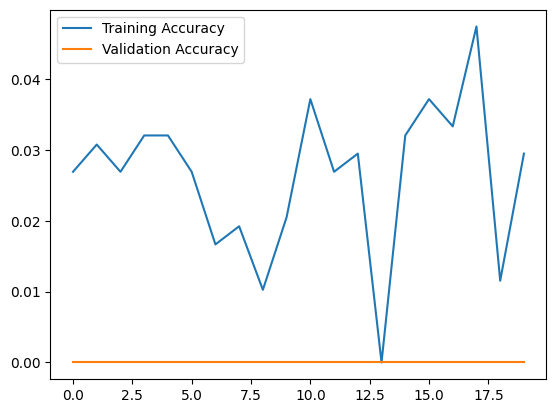

In [19]:
history = model.fit(data2['train_dataset'], validation_data=data2['val_dataset'], batch_size=32, epochs=20)
plot_accuracy(history)

In [20]:
for inps, ops in data2['train_dataset']:
    # print(batch)
    # print("Dataset shape:", batch.shape)
    print("Input shape:", inps.shape)
    print("Target shape:", ops.shape)
    break



Input shape: (32, 500)
Target shape: (32,)


In [21]:
data2['X']

{'train_dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 'val_dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 'test_dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 'X_train': array([[  34, 1271,  320, ...,  676,  220, 1346],
        [5803,   88,  228, ..., 2086,   14,  259],
        [4865, 1487,  631, ...,    0,    0,    0],
        ...,
        [1776, 9585,  533, ...,    0,    0,    0],
        [   1, 3125,    1, ...,    0,    0,    0],
        [ 261,  152,  206, ...,    0,    0,    0]]),
 'X_val': array([[7111, 9550, 4555, ...,    0,    0,    0],
        [   6,  179,  206, ...,    0,    0,    0],
        [  20,    8,    6, ...,    0,    0,    0],
        ...,
        [ 353

In [22]:
model

<TextAnalysisModel2 name=text_analysis_model2_2, built=True>

In [25]:
data2['test_dataset']

<_BatchDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
# Predictionsf.,,.,.sasa
import numpy as np

# new_text = "Your cleaned resume text here"
# processed_text = preprocessor.predict_process(new_text)
predictions = model.predict(data2['test_dataset'])
predicted_label = nlp_processor.decode_predictions(np.argmax(predictions, axis=1))

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [29]:
predicted_label

array(['Advocate', 'Engineering', 'Information Technology', 'Finance',
       'Education', 'Information Technology', 'Information Technology',
       'Information Technology', 'Information Technology', 'Education',
       'Sales', 'Education', 'Sales', 'Sales', 'Information Technology',
       'Accountant', 'Education', 'Engineering', 'Education', 'Advocate',
       'Information Technology', 'Accountant', 'Managment', 'Education',
       'Education', 'Information Technology', 'Engineering', 'Education',
       'Information Technology', 'Accountant', 'Engineering',
       'Engineering', 'Managment', 'Managment', 'Education',
       'Information Technology', 'Information Technology', 'Engineering',
       'Engineering', 'Accountant', 'Engineering', 'Engineering',
       'Engineering', 'Managment', 'Accountant', 'Sales', 'Finance',
       'Information Technology', 'Engineering', 'Engineering', 'Finance',
       'Education', 'Managment', 'Engineering', 'Education', 'Education',
       'Acc

In [33]:
for batch, labels in data2['test_dataset']:
    print(f"Features: {batch} -> Teargets: {labels}")
    break

Features: [[  88 9371  133 ...    0    0    0]
 [ 177  120   25 ...    0    0    0]
 [ 664 1663    6 ...    0    0    0]
 ...
 [3911  592 1169 ...    0    0    0]
 [  58   37    8 ...    0    0    0]
 [ 276  776    1 ...    0    0    0]] -> Teargets: [19 17 14  9 18  5 13 19 14 20 24 15 24 24 12  9  5  2 15  2  0  0  9 21
  1 21 16  1  5  7 20  4]


In [34]:
def generate_predictions_and_accuracy(model, data2, nlp_processor):
    predictions = model.predict(data2['test_dataset'])
    predicted_label = nlp_processor.decode_predictions(np.argmax(predictions, axis=1))
    # Assuming data2['test_dataset'] is a TensorFlow dataset with labels as the second element of the tuple
    labels = np.array(label for _, label in data2['test_dataset'])
    accuracy = np.mean(np.equal(predicted_label, labels))
    return predicted_label, accuracy

predicted_label, accuracy = generate_predictions_and_accuracy(model, data2, nlp_processor)
print("Predicted Labels:", predicted_label)
print("Accuracy:", accuracy)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Labels: ['Advocate' 'Engineering' 'Information Technology' 'Finance' 'Education'
 'Information Technology' 'Information Technology'
 'Information Technology' 'Information Technology' 'Education' 'Sales'
 'Education' 'Sales' 'Sales' 'Information Technology' 'Accountant'
 'Education' 'Engineering' 'Education' 'Advocate' 'Information Technology'
 'Accountant' 'Managment' 'Education' 'Education' 'Information Technology'
 'Engineering' 'Education' 'Information Technology' 'Accountant'
 'Engineering' 'Engineering' 'Managment' 'Managment' 'Education'
 'Information Technology' 'Information Technology' 'Engineering'
 'Engineering' 'Accountant' 'Engineering' 'Engineering' 'Engineering'
 'Managment' 'Accountant' 'Sales' 'Finance' 'Information Technology'
 'Engineering' 'Engineering' 'Finance' 'Education' 'Managment'
 'Engineering' 'Education' 'Education' 'Accountant' 'Accountant'
 'Education' 'Engineering' 'Advocate' 'Accountant'
 'Information Techn

In [35]:
loss, accuracy = model.evaluate(data2['test_dataset'])

print("Loss: ", loss)
print("Accuracy: ", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.0173 - loss: 3.6179     
Loss:  3.566896438598633
Accuracy:  0.053278688341379166
